In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%matplotlib inline

In [3]:
batting_path = 'Batting.csv'
batting = pd.read_csv(batting_path)

players_path = 'People.csv'
players = pd.read_csv(players_path)

In [4]:
total_by_year = batting.groupby('yearID').sum()

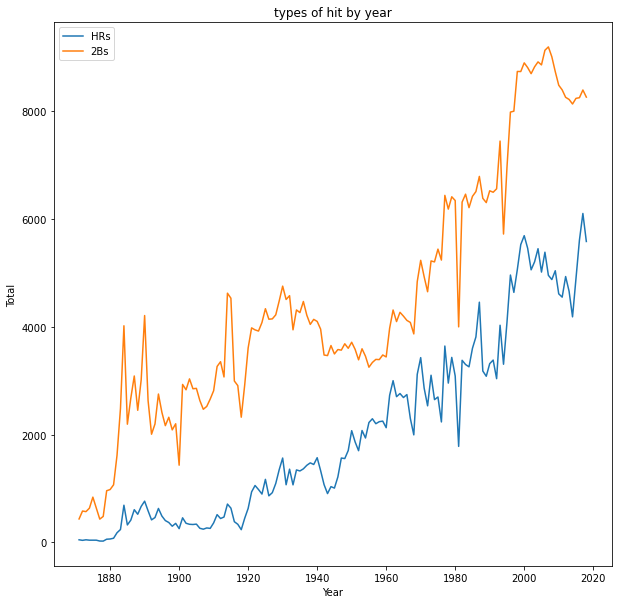

In [5]:
# line plotting

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
ax.set_title('types of hit by year')
ax.plot(total_by_year['HR'], label='HRs')
ax.plot(total_by_year['2B'], label='2Bs')
ax.set_xlabel('Year')
ax.set_ylabel('Total')
#ax.set_ylim([0,20000])
ax.legend()

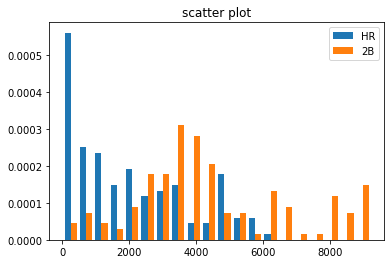

In [6]:
# histograms
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('scatter plot')
#ax.hist(total_by_year['HR'], label='HRs')
ax.hist([total_by_year['HR'], total_by_year['2B']], label=['HR', '2B'], bins=20, density=True)
ax.legend()

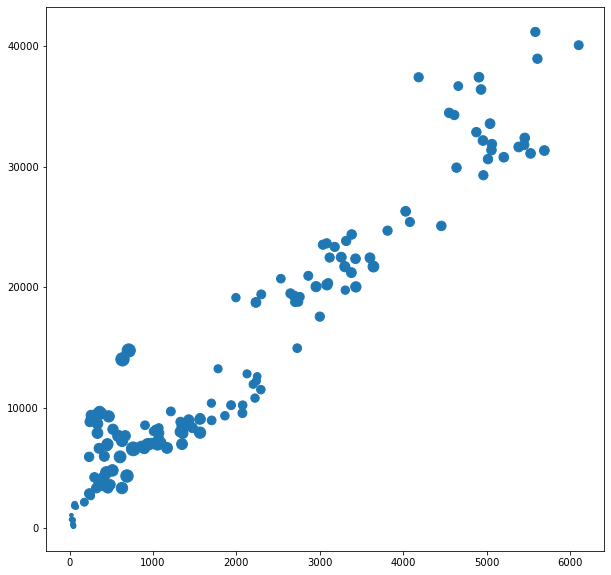

In [7]:
# scatter plots
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(total_by_year['HR'], total_by_year['SO'], s=total_by_year['3B']/10)

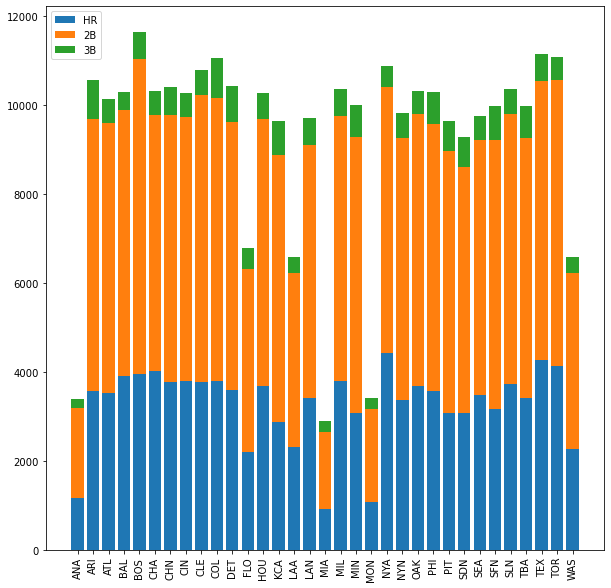

In [8]:
# bar plot
total_by_team = batting[batting['yearID']>1997].groupby('teamID').sum()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
ax.tick_params(axis='x',rotation=90)
ax.bar(x=total_by_team.index, height=total_by_team['HR'], label='HR')
ax.bar(x=total_by_team.index, height=total_by_team['2B'], bottom=total_by_team['HR'], label='2B')
ax.bar(x=total_by_team.index, height=total_by_team['3B'], bottom=total_by_team['HR'] + total_by_team['2B'], label='3B')
ax.legend()

(array([[11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [24.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 5.,  6.,  4., 11.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 13., 12.,  1.,  7.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  3.,  3.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  2., 12.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  3.,  2.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  9.,  3.]]),
 array([ 431. , 1307.6, 2184.2, 3060.8, 3937.4, 4814. , 5690.6, 6567.2,
        7443.8, 8320.4, 9197. ]),
 array([  23. ,  631.2, 1239.4, 1847.6, 2455.8, 3064. , 3672.2, 4280.4,
        4888.6, 5496.8, 6105. ]),
 <matplotlib.collections.QuadMesh at 0x7fe5bd918e20>)

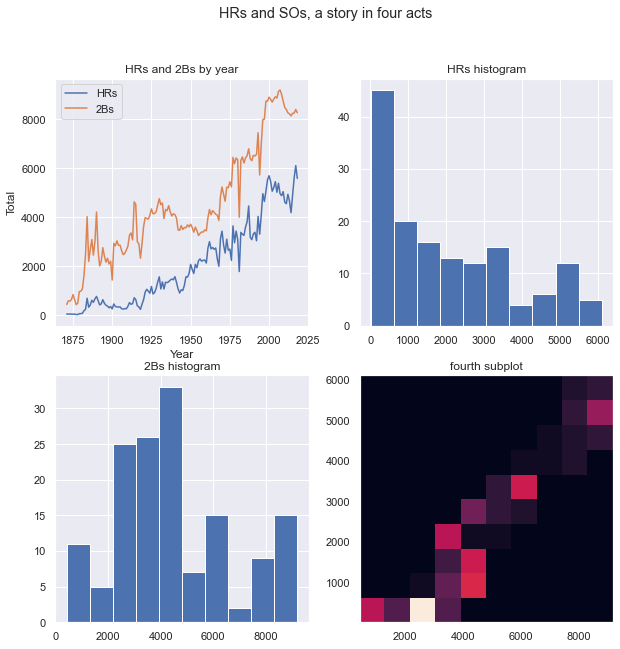

In [23]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('HRs and SOs, a story in four acts')

ax1 = fig.add_subplot(2,2,1)
ax1.set_title('HRs and 2Bs by year')
ax1.plot(total_by_year['HR'], label='HRs')
ax1.plot(total_by_year['2B'], label='2Bs')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total')
ax1.legend()

ax2 = fig.add_subplot(2,2,2)
ax2.set_title('HRs histogram')
ax2.hist(total_by_year['HR'], label='HRs')

ax3 = fig.add_subplot(2,2,3)
ax3.set_title('2Bs histogram')
ax3.hist(total_by_year['2B'], label='HRs')

ax4 = fig.add_subplot(2,2,4)
ax4.set_title('fourth subplot')
ax4.hist2d(total_by_year['2B'], total_by_year['HR'])



Text(0.5, 1.0, 'fourth subplot')

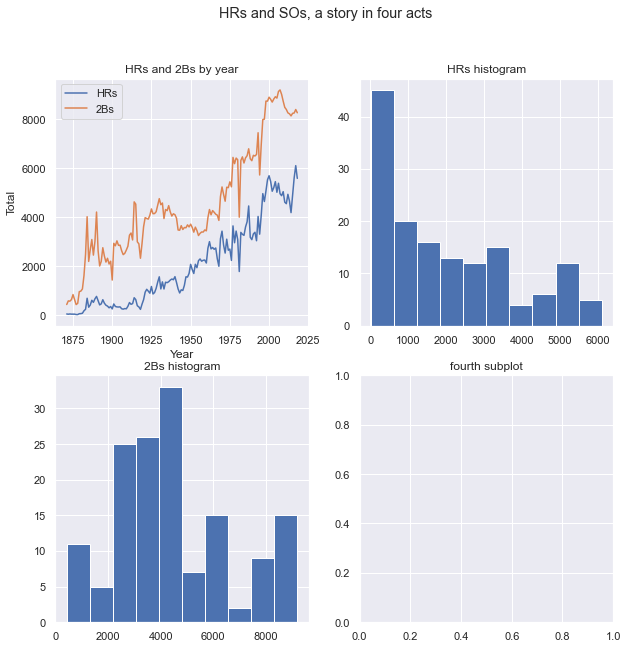

In [21]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
fig.suptitle('HRs and SOs, a story in four acts')

ax1 = ax[0,0]
ax1.set_title('HRs and 2Bs by year')
ax1.plot(total_by_year['HR'], label='HRs')
ax1.plot(total_by_year['2B'], label='2Bs')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total')
ax1.legend()

ax2 = ax[0,1]
ax2.set_title('HRs histogram')
ax2.hist(total_by_year['HR'], label='HRs')

ax3 = ax[1,0]
ax3.set_title('2Bs histogram')
ax3.hist(total_by_year['2B'], label='HRs')

ax4 = ax[1,1]
ax4.set_title('fourth subplot')



Index(['AA', 'AL', 'FL', 'NL', 'PL', 'UA'], dtype='object', name='lgID')


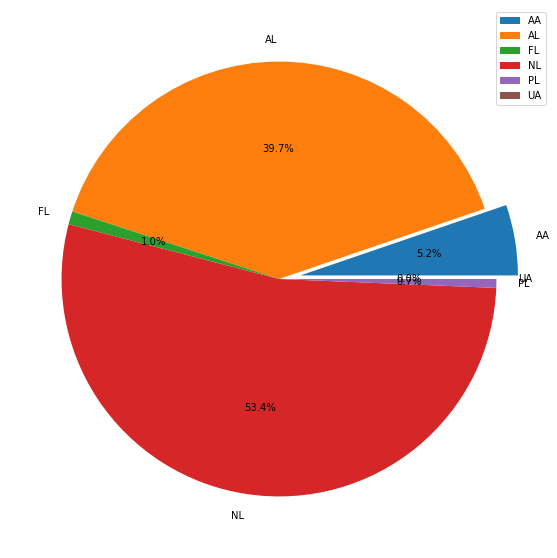

In [10]:
total_by_league = batting.groupby('lgID').sum()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
labels = total_by_league.index
ax.pie(total_by_league['SB'], labels=labels, autopct='%1.1f%%', explode=[0.1, 0,0,0,0,0])
ax.legend()

print(labels)

Text(0.5, 1.0, 'An overly expressive scatterplot')

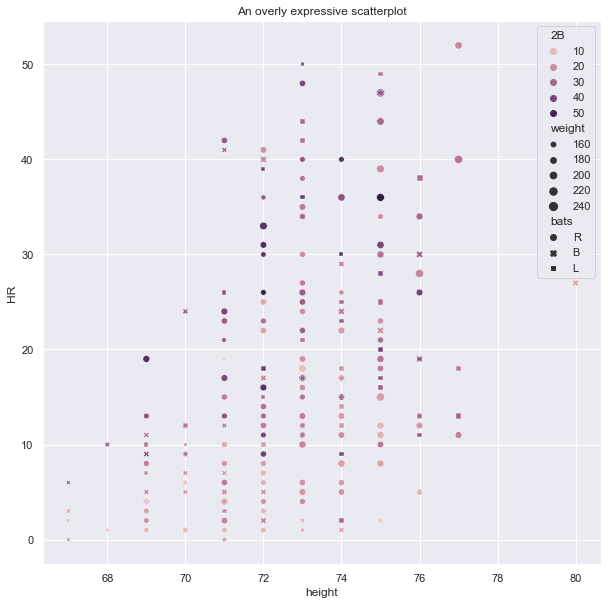

In [11]:
import seaborn as sns

sns.set_theme(style="darkgrid")

bat_year = batting.query('yearID == 1996')
bat_year = bat_year.groupby('playerID').sum()
bat_year = bat_year.join(players.set_index('playerID')[['birthYear', 'bats', 'height', 'weight']])
bat_year = bat_year[bat_year['AB'] > 250]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(bat_year['height'], bat_year['HR'])
ax.clear()

sns.scatterplot(x='height', y='HR', hue='2B', style='bats', size='weight',  data=bat_year,ax=ax)
ax.set_title('An overly expressive scatterplot')

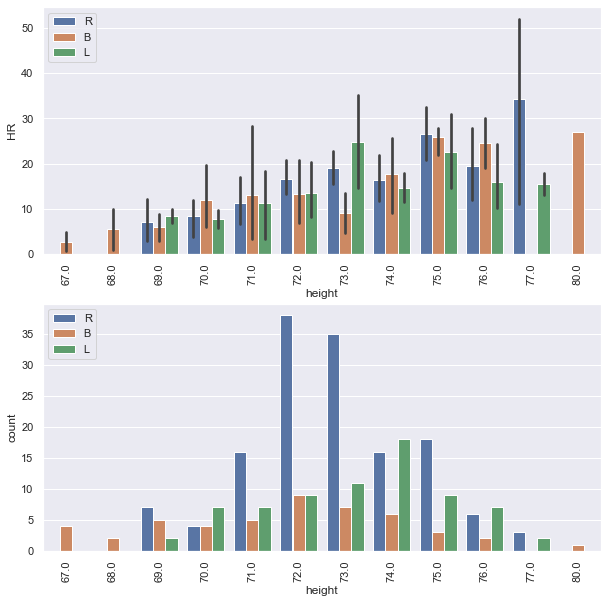

In [12]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sns.barplot(x='height', y='HR', hue='bats', data=bat_year, ax=ax1)
ax1.tick_params(axis='x',rotation=90)

sns.countplot(x='height', hue='bats', data=bat_year, ax=ax2)
ax2.tick_params(axis='x',rotation=90)

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')


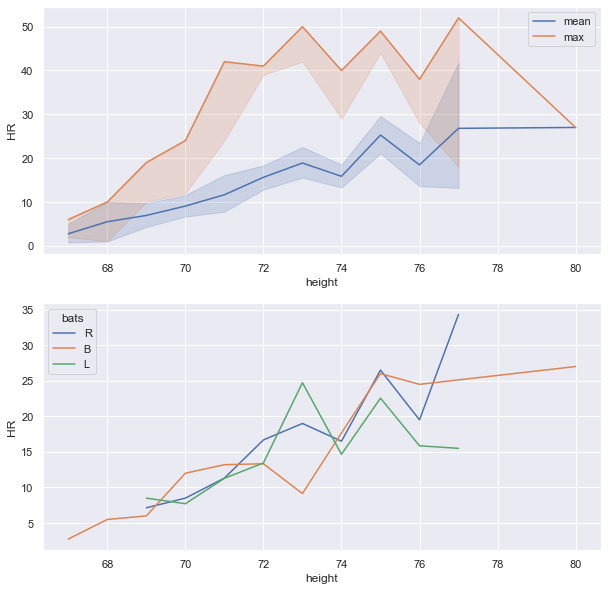

In [13]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sns.lineplot(x='height', y='HR', data=bat_year, ax=ax1, label='mean')
sns.lineplot(x='height', y='HR', data=bat_year, ax=ax1, estimator=np.max, label='max')
sns.lineplot(x='height', y='HR', hue='bats', data=bat_year, ci=None, ax=ax2)
ax1.legend()

<AxesSubplot:xlabel='HR', ylabel='Count'>

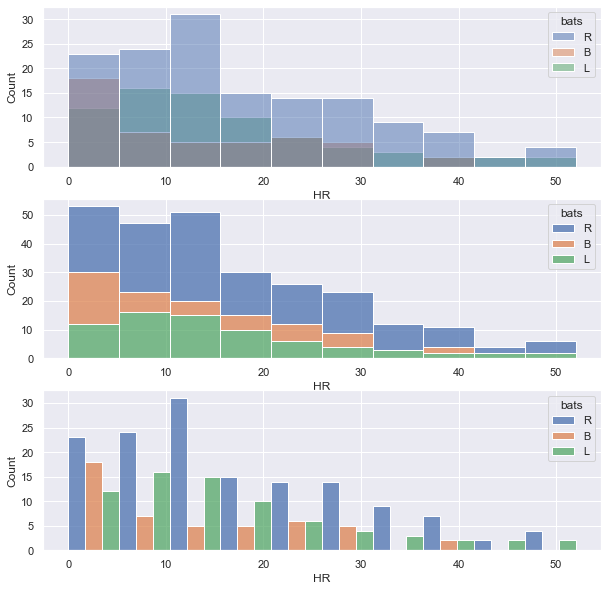

In [14]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

#sns.histplot(data=bat_year, x='HR',ax=ax1, binwidth=5)
#sns.histplot(data=bat_year, x='HR', ax=ax2, bins=8)
#sns.histplot(data=bat_year, x='HR', ax=ax3, bins=[0,10,15,20,30,40,50,60])


sns.histplot(data=bat_year, x='HR', hue='bats', ax=ax1)
sns.histplot(data=bat_year, x='HR', hue='bats', multiple='stack', ax=ax2)
sns.histplot(data=bat_year, x='HR', hue='bats', multiple='dodge', ax=ax3)


<AxesSubplot:xlabel='HR', ylabel='SO'>

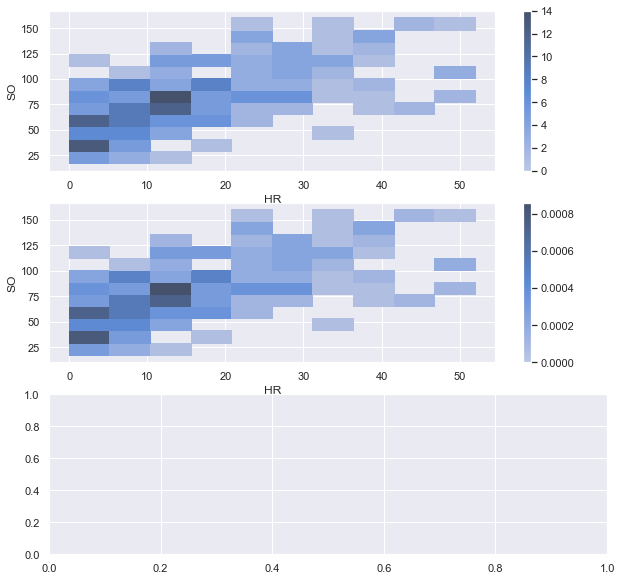

In [15]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)


sns.histplot(data=bat_year, x='HR', y='SO', ax=ax1, cbar=True)
sns.histplot(data=bat_year, x='HR', y='SO', ax=ax2, stat='density', cbar=True)

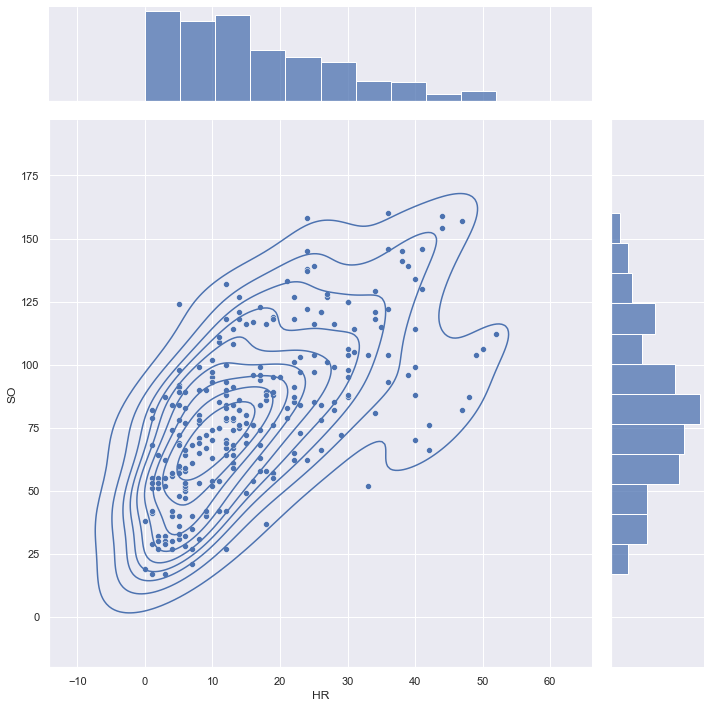

In [17]:
fig = sns.jointplot(x='HR', y='SO', data=bat_year, height=10)
fig.plot_joint(sns.kdeplot)

In [ ]:
fig = sns.pairplot(data=bat_year[['HR', '2B', '3B', 'SO', 'SB', 'bats']], hue='bats',
                  diag_kws={'multiple':'stack'}, diag_kind='hist')
fig.map_upper(sns.kdeplot)
fig.map_lower(sns.regplot)

In [ ]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

ax1.hist(bat_year['HR'])
ax2.scatter(x=bat_year['HR'], y=bat_year['SO'])
ax3.hist(bat_year['SO'], orientation='horizontal')